# Лабораторная работа №5 
# "Численное решение системылинейных уравнений, численное интегрирование"
## Вариант №15
### Выполнила Войтович Дарья
#### Задание:
1. Выбрать из файла vars.pdf свой вариант, включающий систему уравнений с указанием методоврешения системы и определенного интеграла.
2. Вычислить определенный интеграл указанным методом с относительной точностью 0,01.
3. Для любого заданного  построить график подынтегральной функции, а также график зависимостизначения интеграла от номера итерации используемого метода численного интегрирования.
4. Построить график зависимости свободных членов системы от i .
5. Решить систему уравнений заданным (или заданными) методами, взяв число уравнений равным 1000 с относительной точностью 0,001. Определить число обусловленности линейной системы.
6. Построить график решения ${}x_1,...x_n$ от i, график зависимости невязки от i, а также график зависимости нормы решения от номера итерации используемого метода численногорешения системы.

##### Метод прогонки и метод наискорейшего спуска + формула 3/8
\begin{equation*}
 \begin{cases}
   x_1 = 1, 
   \\
   x_{i-1}-(3+{{sin^2icos^5i}\over{i+1}})x_i+(1+cos^2i)x_{i+1}=-\int\limits_0^1 {{exp(-i^2t^2)}\over{1+itcos^2t+t^2}}dt,
   \\
   x_n=0.9x_{n-1}+1
 \end{cases}
\end{equation*}
$i$ пробегает значения от $2$ до $n-1$

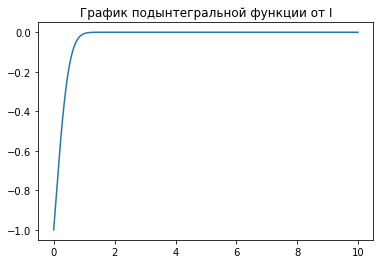

In [5]:
import numpy as np 
from numpy import * #,sqrt,exp
import matplotlib.pyplot as plt
t=np.arange(0,10,0.01)

def f(i,t):
    f=-(exp(-(i**2)*(t**2)))/(1+i*t*(cos(t))**2+t**2)
    return f

# print(f(1,0.1))
tlist=np.arange(0,10,0.01)
plt.plot(tlist,f(2,tlist))
plt.title('График подынтегральной функции от I')
plt.show()

## подсчет интеграла
Для построения численного алгоритма вычисления интеграла пространство, где необходимо его подсчитать, дискретизируем, то есть в данном случае разбиваем отрезок на некоторое число частей. Разбиение проводим до тех пор, пока относительная погрещность не станет меньше заданной. Затем на каждом подпространстве применяем формулу 3/8:
$\sum\limits_{k=0}^3C_k^{(3)}f(x_k^{(3)})={{\beta-\alpha}\over{8}}(f(\alpha)+3f({{2\alpha+\beta}\over{3}})+3f({{\alpha+2\beta}\over{3}})+f(\beta))$

[-0.003025437005106736, 7, 'номер уравнения', 200]


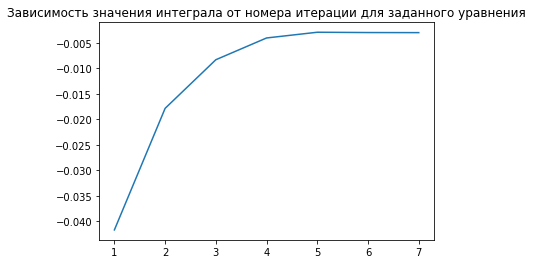

In [6]:
n=100
X=[]
Y=[]

def Int(m): # m-номер уравнения
    a=0
    b=1

    def F(t):
        return f(m,t)

    def f38(a,b):
        return (b-a)/8*(F(a)+3*F((2*a+b)/3)+3*F((a+2*b)/3)+F(b))

    eps=0.01
    Iold=np.inf
    I=f38(a,b)
    N=2
    i=0 # i - номер итерации

    while abs(I-Iold)/abs(I)>eps:
        i+=1
        N=N*2
        S=np.linspace(a,b,N) # эквидистантное разбиение
        h=S[1]-S[0] # шаг разбиения

        Iold=I
        I=np.sum([f38(ai,ai+h) for ai in S[:-1]])
        X.append(i)
        Y.append(I)
        
    return [I,i,'номер уравнения',m]
    
print(Int(200))

plt.plot(X,Y)
plt.title('Зависимость значения интеграла от номера итерации для заданного уравнения')
plt.show()


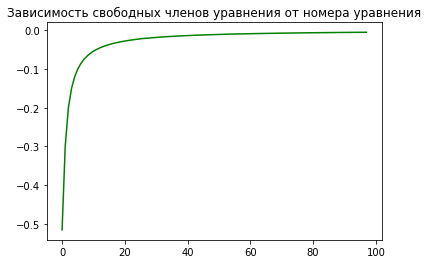

In [11]:
plt.plot([Int(k)[0] for k in range(1,n-1)],color='green')
plt.title('Зависимость свободных членов уравнения от номера уравнения')
plt.show()

## метод прогонки
\begin{equation}
x_{i-1}=L_ix_i+M_i \\i=2,3,..n
\end{equation}
Процесс нахождения коэффициентов $L_i$, $M_i$ назыввается прямым ходом метода
\begin{equation}
x_n={{b_nM_n-a_n}\over{L_na_n+d_n}}
\end{equation}
последовательное нахождение $x_{n-1},..x_1$ называется обратным ходом

In [12]:
import numpy as np
from math import sin, cos, sqrt, exp

# n=5
# Заполняем матрицы уравнения Ax=b 
A=np.zeros([n,n], dtype=np.float32) 
for j in range(1,n-1): 
    A[j][j]=-(3+sin(j+1)**2*cos(j+1)**5/(j+1+1)) 
for j in range(1,n-1): 
    A[j][j-1]=1 
    A[j][j+1]=(1+cos(j+1)**2) 
A[0][0]=1 
A[n-1][n-1]=1 
A[n-1][n-2]=-0.9
# print(A)

# Заполнение матрицы b
b=np.zeros(n, dtype=np.float32)
for j in range(1,n-1):
#     def F(t): 
#         return f(j+1,t) 
#     print(j)
    if n<=1000:
        b[j]=Int(j+1)[0]
#     else:
#         b[j]=-spint.quad(F,0,1)[0] 
b[0]=1        
b[n-1]=1
# print('Fill matrix finished')
# print(b)

print('Число обусловленности СЛАУ %s'%np.linalg.cond(A))

# найдем коэффициенты L,M
l=np.zeros(n-1)
m=np.zeros(n-1)

def LM(n,p): #LM[0]-коэффициент Lk, LM[1]-Mk
    l[0]=0 
    m[0]=0
    for k in range(n-2):
        m[k+1]=(b[k]-m[k]*A[k,k-1])/(A[k,k-1]*l[k]+A[k,k])
        l[k+1]=-A[k,k+1]/(A[k,k-1]*l[k]+A[k,k])
#         print(l[k+1],k)
    return [l[p-1],m[p-1]]

# for i in range(2,n):
#     print(i)

# print(LM(n,n-1))

def findx(n):
    x=np.zeros(n)
    x[n-1]=(b[n-1]-LM(n,n-1)[1]*A[n-1,n-2])/(LM(n,n-1)[0]*A[n-1,n-2]+A[n-1,n-1])
#     print(x[n-1])
    for i in range(n-1):
        i=n-1-i
#         print(i)
        x[i-1]=LM(n,i-1)[0]*x[i]+LM(n,i-1)[1]
#         print(LM(n,i-1)[0],x[i-1])
    return x
print(findx(n))
print('решение встроенной функцией:',np.linalg.solve(A,b))

B_new=A@findx(n)
# print(B_new)
norm=np.linalg.norm(b-B_new)
print(norm)


Число обусловленности СЛАУ 13.760394
[0.00462421 0.         1.         0.62475007 0.48822011 0.32139299
 0.22453174 0.2141028  0.16593521 0.12717914 0.1370767  0.11767616
 0.09045137 0.09897063 0.09168947 0.07143818 0.07794747 0.07706649
 0.06005436 0.06274693 0.06601844 0.05235363 0.05212991 0.05779996
 0.0468847  0.04399536 0.05077409 0.04253788 0.03797777 0.04533978
 0.03962155 0.03367704 0.04028053 0.03689995 0.03045332 0.03611664
 0.03486589 0.02812022 0.03215928 0.03284979 0.02642279 0.02885226
 0.03111459 0.0251743  0.02585877 0.02931708 0.02417392 0.02333389
 0.02752609 0.02335914 0.02121957 0.02563551 0.02258451 0.01953694
 0.02375916 0.02190226 0.01824444 0.02192356 0.02134243 0.01748658
 0.02039437 0.02094774 0.01695692 0.0187533  0.02033926 0.01656577
 0.01725533 0.01966074 0.01628478 0.0158943  0.01885045 0.016051
 0.01475398 0.01797135 0.0158827  0.01385629 0.01700734 0.01574364
 0.01326947 0.01619051 0.01585352 0.01313968 0.01580888 0.01673982
 0.01422082 0.01754    0.02

## метод наискорейшого спуска

In [45]:
# Начальное приближение
x0=b/np.diag(A)
eps=0.001
E=np.identity(n)
E=np.ones([n,n])

AAT=A@A.T
R=[]
I=[]
NORM=[]

def findx2(n,x0):
    xi=b+1000*eps
    ri=np.ones(n)
    i=0
    while np.linalg.norm(ri)>eps:
            R.append(ri)
            I.append(i)
            NORM.append(np.linalg.norm(x0))
            ri=A@x0-b #невязка
            AATR=AAT@ri
            tayi=np.dot(AATR,ri)/np.dot(AATR,AATR)
            xi=x0-(tayi*A.T)@ri
            x0=xi
            i+=1
    x=xi
    return [x,i]

x=findx2(n,x0)[0]
print('найденное решение:',x,'число итераций:',findx2(n,x0)[1])
print('решение встроенной функцией:',np.linalg.solve(A,b))

B_new=A@x
norm=np.linalg.norm(b-B_new)
print('норма разностного вектора b:',norm)


найденное решение: [1.00000000e+00 6.24750078e-01 4.88220036e-01 3.21393073e-01
 2.24531606e-01 2.14102969e-01 1.65934995e-01 1.27179340e-01
 1.37076497e-01 1.17676415e-01 9.04511288e-02 9.89708751e-02
 9.16891918e-02 7.14384615e-02 7.79472217e-02 7.70667717e-02
 6.00540638e-02 6.27471730e-02 6.60181493e-02 5.23539335e-02
 5.21296524e-02 5.78002445e-02 4.68843840e-02 4.39956337e-02
 5.07738031e-02 4.25382145e-02 3.79774906e-02 4.53400575e-02
 3.96212339e-02 3.36773172e-02 4.02802639e-02 3.69002596e-02
 3.04530356e-02 3.61168832e-02 3.48655917e-02 2.81205028e-02
 3.21590230e-02 3.28500792e-02 2.64224950e-02 2.88525019e-02
 3.11143100e-02 2.51745917e-02 2.58585233e-02 2.93173436e-02
 2.41736285e-02 2.33341362e-02 2.75258329e-02 2.33594291e-02
 2.12193262e-02 2.56357528e-02 2.25842316e-02 1.95371881e-02
 2.37589292e-02 2.19025295e-02 1.82441901e-02 2.19237823e-02
 2.13421639e-02 1.74868181e-02 2.03941278e-02 2.09479630e-02
 1.69566218e-02 1.87534355e-02 2.03388743e-02 1.65658537e-02
 1.72

 8.26369703e-01 1.51219726e+00 2.92521453e+00 3.63269305e+00]
норма разностного вектора b: 0.00099631


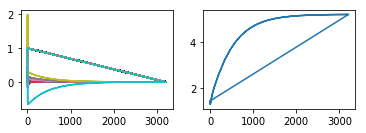

In [46]:
# print(I,R)
plt.subplot(2,2,1)
plt.plot(I,R)
plt.subplot(2,2,2)
plt.plot(I,NORM)
plt.show()

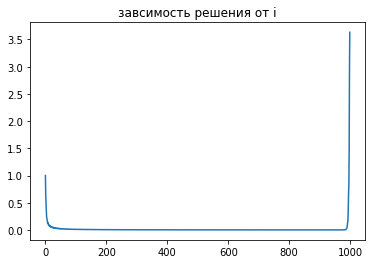

In [51]:
XX=[]
for i in range(len(x)):
    XX.append(x[i])
K=np.arange(n)
plt.plot(K,XX)
plt.title('завсимость решения от i')
plt.show()

In [ ]:
b=np.hstack([0,b])
d=np.hstack([0,np.diag(A,k=0)])
c=np.hstack([0,np.diag(A,k=1)])
a=np.hstack([0,0,np.diag(A,k=-1)])

def L(n):
	if n==2:
		return -c[1]/d[1]
	else:
		i=n-1
		return -c[i]/(a[i]*L(i)+d[i])

def M(n):
	if n==2:
		return b[1]/d[1]
	else:
		i=n-1
		return (b[i]-M(i)*a[i])/(a[i]*L(i)+d[i])

x=np.zeros(n+1)
x[n]=(b[n]-M(n)*a[n])/(a[n]*L(n)+d[n])

for i in reversed(range(1,n)): # n, n-1, ..., 1
	x[i]=x[i+1]*L(i+1)+M(i+1)

# Обрезаем лишний нолик 
x=x[1:]
# print(x)
B_new=A@x
norm=np.linalg.norm(b-B_new)
print('норма разностного вектора b:',norm)

In [ ]:
def matA(n):
    for i in range(1,n-1):
        for j in range(1,n-1):
            if i==j: 
                k=i+1 #k-номер строки, от 2 до n-1
                A[i,j]=-(3+(((sin(k))**2)*(cos(k))**5)/(k+1))
            elif i==j-1:
                A[i,j+1]=1+(cos(k))**2
                A[n-2,n-1]=1+(cos(n-1))**2
            elif i==j+1:
                A[i,j]=1
                A[1,0]=1
    return A